In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']

C:\Users\alexk\Documents\GitHub\SubFinder\notebooks_and_code


### ROC-AUC score: Comparison of model with ESM-1b and ESM-1b_ts

In [2]:
y_test_pred_esm1b_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ECFP.npy"))
test_y_esm1b_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ECFP.npy"))

y_test_pred_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))
test_y_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP.npy"))

y_test_pred_esm1b_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_GNN.npy"))
test_y_esm1b_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_GNN.npy"))

y_test_pred_esm1b_ts_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN.npy"))
test_y_esm1b_ts_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN.npy"))

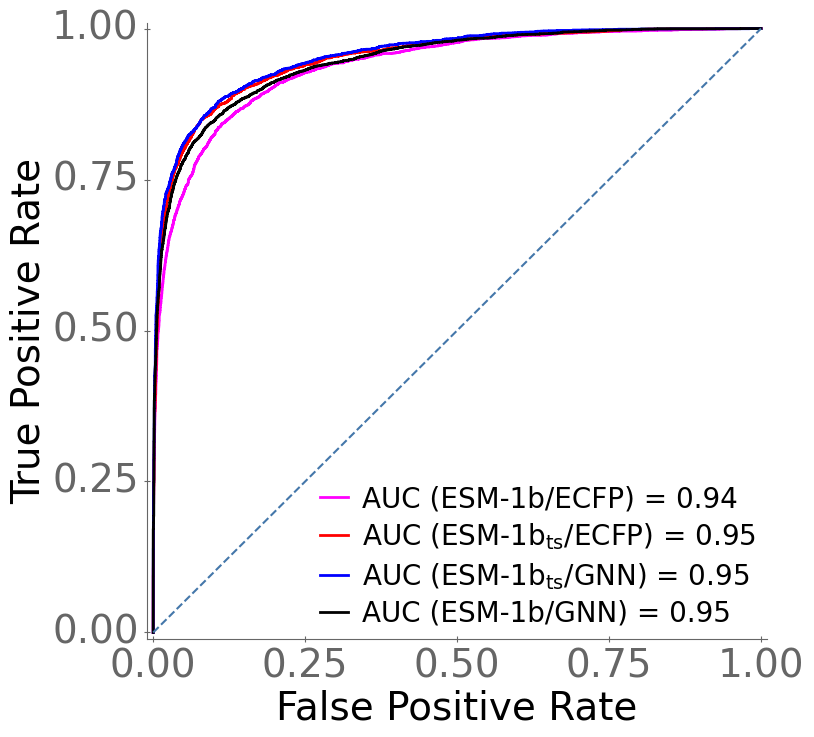

In [4]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})

fpr_esm1b_ecfp, tpr_esm1b_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ecfp, y_test_pred_esm1b_ecfp)
roc_auc_esm1b_ecfp = metrics.auc(fpr_esm1b_ecfp, tpr_esm1b_ecfp)

fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp, y_test_pred_esm1b_ts_ecfp)
roc_auc_esm1b_ts_ecfp = metrics.auc(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp)


fpr_esm1b_gnn, tpr_esm1b_gnn, threshold = metrics.roc_curve(test_y_esm1b_gnn, y_test_pred_esm1b_gnn)
roc_auc_esm1b_gnn = metrics.auc(fpr_esm1b_gnn, tpr_esm1b_gnn)

fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn, y_test_pred_esm1b_ts_gnn)
roc_auc_esm1b_ts_gnn = metrics.auc(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn)

#plt.title('Receiver Operating Characteristic')
plt.plot(fpr_esm1b_ecfp, tpr_esm1b_ecfp, 'magenta', label = 'AUC (ESM-1b/ECFP) = %0.2f' % roc_auc_esm1b_ecfp, linewidth=2.0)
plt.plot(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, 'r', label = 'AUC (ESM-$1b_{ts}$/ECFP) = %0.2f' % roc_auc_esm1b_ts_ecfp, linewidth=2.0)

plt.plot(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, 'blue', label = 'AUC (ESM-$1b_{ts}$/GNN) = %0.2f' % roc_auc_esm1b_ts_gnn, linewidth=2.0)
plt.plot(fpr_esm1b_gnn, tpr_esm1b_gnn, 'black', label = 'AUC (ESM-1b/GNN) = %0.2f' % roc_auc_esm1b_gnn, linewidth=2.0)


ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

plt.legend(loc = 'lower right', fontsize =20)
plt.plot([0, 1], [0, 1],'--')
eps = 0.01
plt.xlim([0-eps, 1+eps])
plt.ylim([0-eps, 1+eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

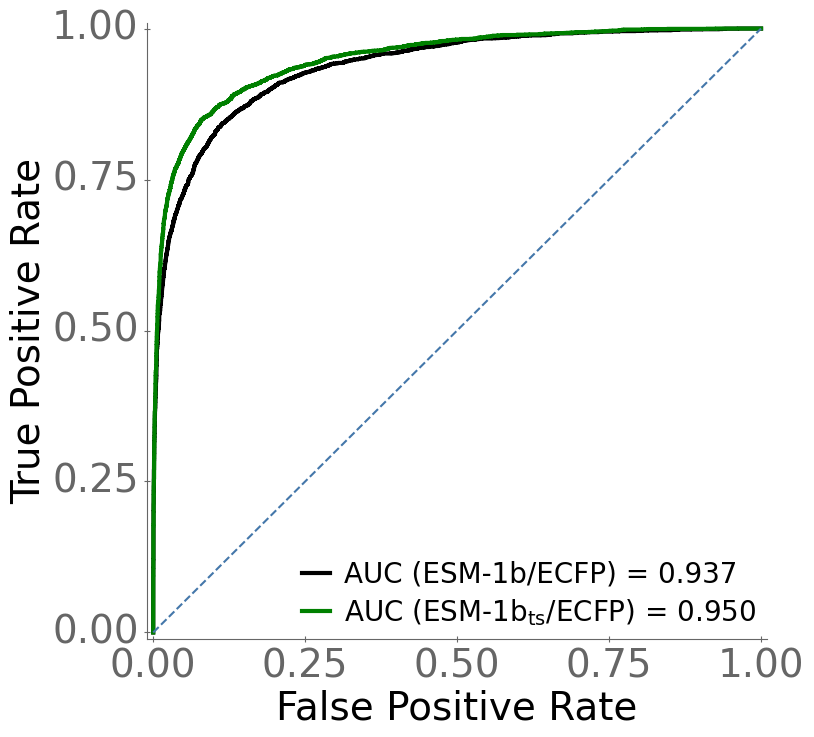

In [5]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})

fpr_esm1b_ecfp, tpr_esm1b_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ecfp, y_test_pred_esm1b_ecfp)
roc_auc_esm1b_ecfp = metrics.auc(fpr_esm1b_ecfp, tpr_esm1b_ecfp)

fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp, y_test_pred_esm1b_ts_ecfp)
roc_auc_esm1b_ts_ecfp = metrics.auc(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp)


fpr_esm1b_gnn, tpr_esm1b_gnn, threshold = metrics.roc_curve(test_y_esm1b_gnn, y_test_pred_esm1b_gnn)
roc_auc_esm1b_gnn = metrics.auc(fpr_esm1b_gnn, tpr_esm1b_gnn)

fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn, y_test_pred_esm1b_ts_gnn)
roc_auc_esm1b_ts_gnn = metrics.auc(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn)

#plt.title('Receiver Operating Characteristic')
plt.plot(fpr_esm1b_ecfp, tpr_esm1b_ecfp, 'black', label = 'AUC (ESM-1b/ECFP) = %0.3f' % roc_auc_esm1b_ecfp, linewidth=3.0)
plt.plot(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, 'green', label = 'AUC (ESM-$1b_{ts}$/ECFP) = %0.3f' % roc_auc_esm1b_ts_ecfp, linewidth=3.0)

#plt.plot(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, 'blue', label = 'AUC (ESM-$1b_{ts}$/GNN) = %0.2f' % roc_auc_esm1b_ts_gnn, linewidth=2.0)
#plt.plot(fpr_esm1b_gnn, tpr_esm1b_gnn, 'black', label = 'AUC (ESM-1b/GNN) = %0.2f' % roc_auc_esm1b_gnn, linewidth=2.0)


ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

plt.legend(loc = 'lower right', fontsize =20)
plt.plot([0, 1], [0, 1],'--')
eps = 0.01
plt.xlim([0-eps, 1+eps])
plt.ylim([0-eps, 1+eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()#

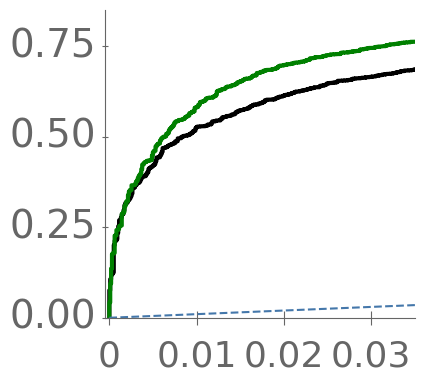

In [6]:
fig, ax = plt.subplots(figsize= (4,4))
plt.rcParams.update({'font.size': 28})

fpr_esm1b_ecfp, tpr_esm1b_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ecfp, y_test_pred_esm1b_ecfp)
roc_auc_esm1b_ecfp = metrics.auc(fpr_esm1b_ecfp, tpr_esm1b_ecfp)

fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp, y_test_pred_esm1b_ts_ecfp)
roc_auc_esm1b_ts_ecfp = metrics.auc(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp)


fpr_esm1b_gnn, tpr_esm1b_gnn, threshold = metrics.roc_curve(test_y_esm1b_gnn, y_test_pred_esm1b_gnn)
roc_auc_esm1b_gnn = metrics.auc(fpr_esm1b_gnn, tpr_esm1b_gnn)

fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn, y_test_pred_esm1b_ts_gnn)
roc_auc_esm1b_ts_gnn = metrics.auc(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn)

#plt.title('Receiver Operating Characteristic')
plt.plot(fpr_esm1b_ecfp, tpr_esm1b_ecfp, 'black', label = 'AUC (ESM-1b/ECFP) = %0.3f' % roc_auc_esm1b_ecfp, linewidth=3.0)
plt.plot(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, 'green', label = 'AUC (ESM-$1b_{ts}$/ECFP) = %0.3f' % roc_auc_esm1b_ts_ecfp, linewidth=3.0)

#plt.plot(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, 'blue', label = 'AUC (ESM-$1b_{ts}$/GNN) = %0.2f' % roc_auc_esm1b_ts_gnn, linewidth=2.0)
#plt.plot(fpr_esm1b_gnn, tpr_esm1b_gnn, 'black', label = 'AUC (ESM-1b/GNN) = %0.2f' % roc_auc_esm1b_gnn, linewidth=2.0)



ticks2 = np.array([0,0.01,0.02, 0.03])
labs = ["0", "0.01", "0.02", "0.03"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=10, rotation = 0)


plt.plot([0, 1], [0, 1],'--')
eps = 0.5*1e-3
plt.xlim([0-eps, 0.035])
plt.ylim([0-eps, 0.85])#1+eps])
ax.locator_params(axis="y", nbins=4)
#ax.locator_params(axis="x", nbins=3)



plt.show()#

### Plotting different levels of substrate similarity levels versus accuracy

In [10]:
df_test  = pd.read_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_test_with_ESM1b_ts_GNN.pkl"))
df_test = df_test.loc[df_test["ESM1b"] != ""]
df_test = df_test.loc[df_test["type"] != "engqvist"]
df_test = df_test.loc[df_test["GNN rep"] != ""]
df_test.reset_index(inplace = True, drop = True)
df_test["pred"] = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))


df_train = pd.read_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_train_with_ESM1b_ts_GNN.pkl"))
df_train = df_train.loc[df_train["ESM1b"] != ""]
df_train = df_train.loc[df_train["type"] != "engqvist"]
df_train.reset_index(inplace = True, drop = True)

In [11]:
'''df_chebi_to_inchi = pd.read_csv(join(CURRENT_DIR, ".." ,"data", "substrate_data", "chebiID_to_inchi.tsv"), sep = "\t")
mol_folder = "E:\\projects_old_V2\\Prediction_of_KM_V3\\datasets\\"

from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs


def get_mol(met_ID):
    is_CHEBI_ID = (met_ID[0:5] == "CHEBI")
    is_InChI = (met_ID[0:5] == "InChI")
    if is_CHEBI_ID:
        try:
            ID = int(met_ID.split(" ")[0].split(":")[-1])
            Inchi = list(df_chebi_to_inchi["Inchi"].loc[df_chebi_to_inchi["ChEBI"] == float(ID)])[0]
            mol = Chem.inchi.MolFromInchi(Inchi)
        except:
            mol = None     
    elif is_InChI:
        try:
            mol = Chem.inchi.MolFromInchi(met_ID)
        except:
            mol = None
        
    else:
        try:
            mol = Chem.MolFromMolFile(mol_folder +  "mol-files\\" + met_ID + '.mol')
        except OSError:
            mol = None
            
    return(mol)

def get_metabolites_and_similarities(df, fp):
    df_metabolites = pd.DataFrame(data = {"ECFP": df["ECFP"], "ID": df["molecule ID"]})
    df_metabolites = df_metabolites.drop_duplicates()
    df_metabolites.reset_index(inplace = True, drop = True)

    ms = [get_mol(met_ID = df_metabolites["ID"][ind]) for ind in df_metabolites.index]
    fps = [Chem.RDKFingerprint(x) for x in ms]

    similarity_vector = np.zeros(len(ms))
    for i in range(len(ms)):
        similarity_vector[i] = DataStructs.FingerprintSimilarity(fps[i], fp)
    return(max(similarity_vector))


train_ECFPs = list(df_train["ECFP"].loc[df_train["Binding"] == 1])
train_substrate_IDs = list(df_train["substrate ID"].loc[df_train["Binding"] == 1])
train_ECFPs_set = set(train_substrates)

df = pd.DataFrame(data = {"ECFP" : train_ECFPs, "molecule ID" : train_substrate_IDs})
df.drop_duplicates(inplace = True)


df_test["count_ident_subs"] = np.nan
df_test["max_sub_sim"] = np.nan

for ind in df_test.index:
    if ind >=-1:
        ecfp = df_test["ECFP"][ind]
        no_ident = sum([ecfp == train_ecfp for train_ecfp in train_ECFPs])
        if no_ident == 0:
            mol = get_mol(met_ID = df_test["substrate ID"][ind])
            fp = Chem.RDKFingerprint(mol)
            df_test["max_sub_sim"][ind] = get_metabolites_and_similarities(df = df, fp = fp)
            df_test["count_ident_subs"][ind] = 0
        else:
            df_test["max_sub_sim"][ind] = 1
            df_test["count_ident_subs"][ind] = no_ident
            
            
df_test.to_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_test_with_ESM1b_ts_GNN_with_sub_sim.pkl"))''';

0 0.7391304347826086 529
1 0.7985611510791367 417
2 0.8623853211009175 327
3 0.8822355289421158 501
4 0.9251497005988024 334
5 0.8918032786885246 305
6 0.856140350877193 285
7 0.9152542372881356 354
8 0.8776595744680851 188
9 0.9240924092409241 303
10 0.8842105263157894 190
>10 0.9243793497455074 9627


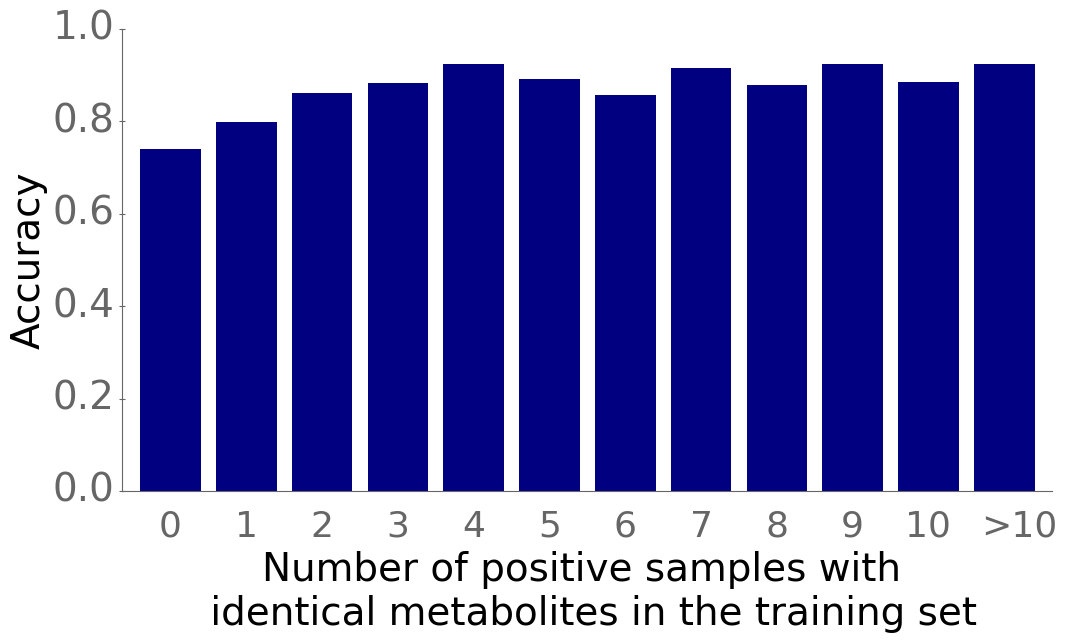

In [14]:
df_test = pd.read_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_test_with_ESM1b_ts_GNN_with_sub_sim.pkl"))

sub_bins = list(range(11))
accuracies = []
for k in sub_bins:
    df_help = df_test.loc[df_test["count_ident_subs"] == k]
    pred = np.round(np.array(df_help["pred"]))
    true = np.array(df_help["Binding"])
    acc = np.mean(pred == true)
    accuracies.append(acc)
    print(k, acc, len(pred))

df_help = df_test.loc[df_test["count_ident_subs"] > 10]
pred = np.round(np.array(df_help["pred"]))
true = np.array(df_help["Binding"])
acc = np.mean(pred == true)
print(">10", acc, len(pred))
accuracies.append(acc)
sub_bins.append(11)


plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))
#plt.title("Distribution of predicted probabilities", fontsize= 30, y= 1)

plt.bar(sub_bins, height = accuracies,  color= "navy")

plt.xlabel('Number of positive samples with \n identical metabolites in the training set')
plt.ylabel('Accuracy')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

ticks2 = np.array(list(range(11)) + [11.2])
labs = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", ">10"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0,1))


plt.show()

0 -0.005033491278737445 529
1 0.2810593547673794 417
2 0.594597671094048 327
3 0.616024331255936 501
4 0.7806146127538787 334
5 0.6830264596811378 305
6 0.5413394713675732 285
7 0.7528882880415986 354
8 0.6466897488710329 188
9 0.7779897523020257 303
10 0.709040481266117 190
>10 0.9243793497455074 9627


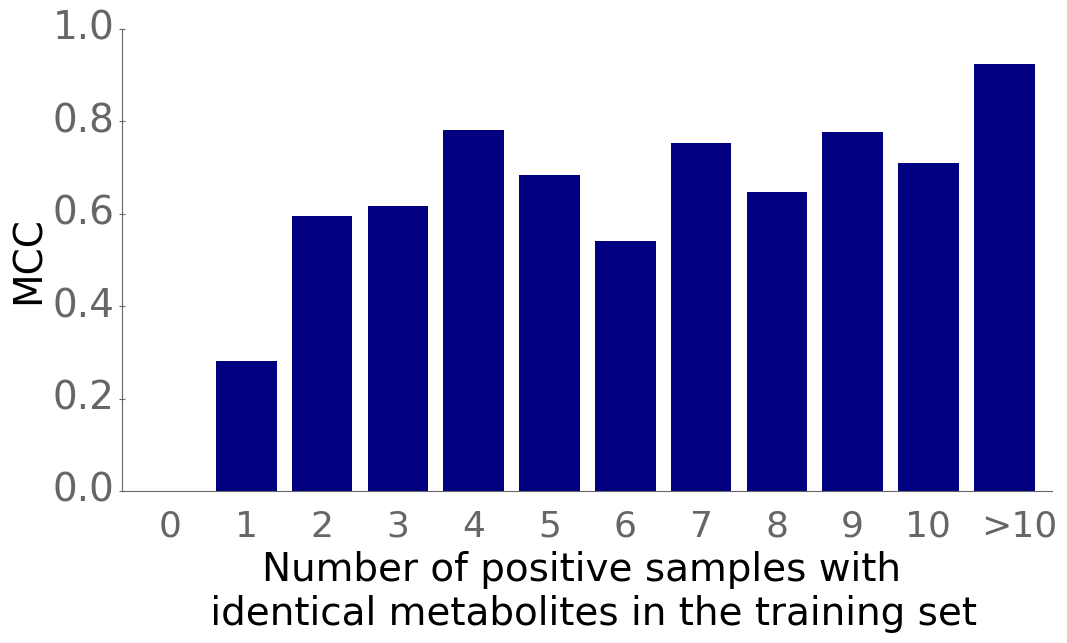

In [15]:
from sklearn.metrics import matthews_corrcoef

sub_bins = list(range(11))
MCCs = []
for k in sub_bins:
    df_help = df_test.loc[df_test["count_ident_subs"] == k]
    pred = np.round(np.array(df_help["pred"]))
    true = np.array(df_help["Binding"])
    mcc = matthews_corrcoef(true, pred)
    MCCs.append(mcc)
    print(k, mcc, len(pred))

df_help = df_test.loc[df_test["count_ident_subs"] > 10]
pred = np.round(np.array(df_help["pred"]))
true = np.array(df_help["Binding"])
mcc = np.mean(pred == true)
print(">10", mcc, len(pred))
MCCs.append(mcc)
sub_bins.append(11)


plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))
#plt.title("Distribution of predicted probabilities", fontsize= 30, y= 1)

plt.bar(sub_bins, height = MCCs,  color= "navy")

plt.xlabel('Number of positive samples with \n identical metabolites in the training set')
plt.ylabel('MCC')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

ticks2 = np.array(list(range(11)) + [11.2])
labs = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", ">10"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0,1))


plt.show()

0.0 - 0.2 nan 0
0.2 - 0.4 0.75 16
0.4 - 0.6 0.7857142857142857 112
0.6 - 0.8 0.7129629629629629 108
0.8 - 0.99 0.7129629629629629 216


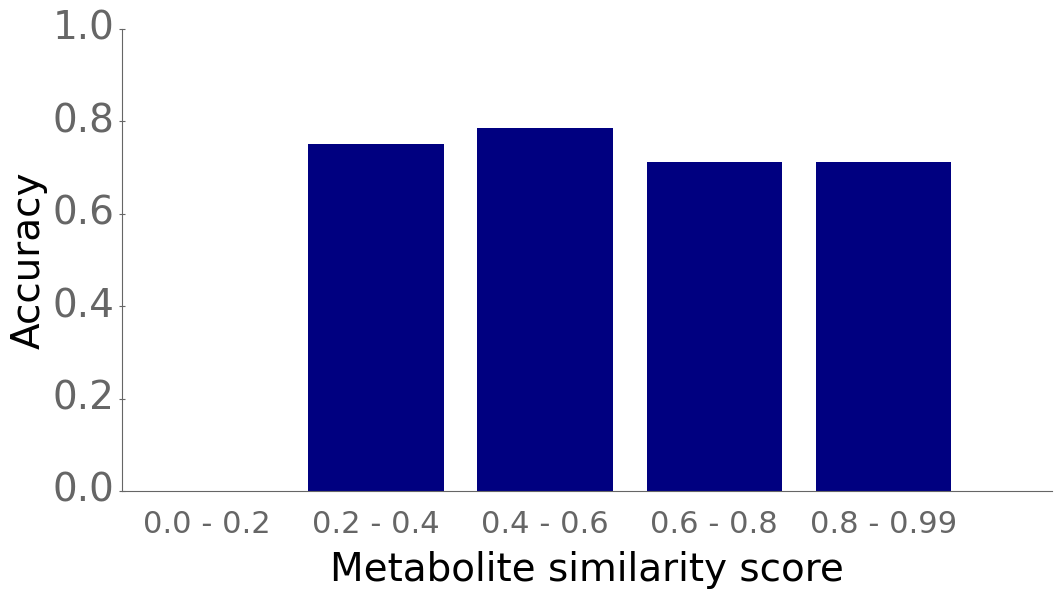

In [16]:
df_test2 = df_test.loc[df_test["count_ident_subs"] ==0]

sim_bins_lb = [0.0, 0.2, 0.4, 0.6, 0.8]
sim_bins_ub = [0.2, 0.4, 0.6, 0.8,0.99]
accuracies = []
for i in range(len(sim_bins_lb)):
    df_help = df_test2.loc[df_test2["max_sub_sim"] < sim_bins_ub[i]].loc[df_test2["max_sub_sim"] > sim_bins_lb[i]]
    pred = np.round(np.array(df_help["pred"]))
    true = np.array(df_help["Binding"])
    acc = np.mean(pred == true)
    accuracies.append(acc)
    print("%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]), acc, len(pred))

plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))

plt.bar(range(len(sim_bins_lb)), height = accuracies,  color= "navy")

plt.xlabel('Metabolite similarity score')
plt.ylabel('Accuracy')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

ticks2 = np.array(range(len(sim_bins_lb)))
labs = ["%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]) for i in range(len(sim_bins_lb))]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=22)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0,1))
plt.xlim((-0.5, 5))


plt.show()

0.0 - 0.2 0.0 0
0.2 - 0.4 0.0 16
0.4 - 0.6 0.19202973955984234 112
0.6 - 0.8 -0.032727570251991044 108
0.8 - 0.99 -0.07164467347787631 216


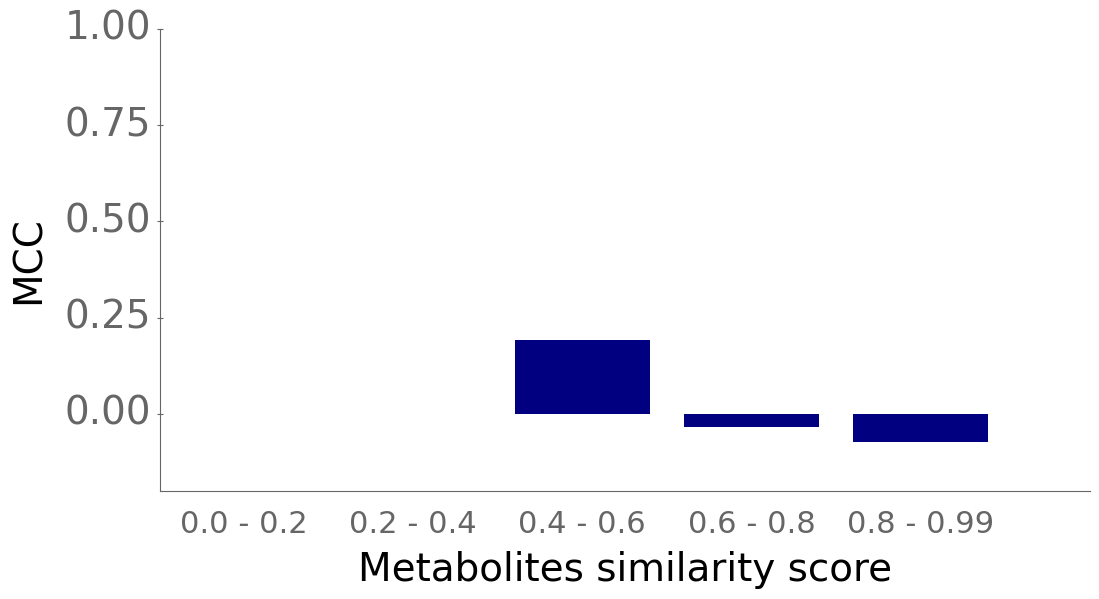

In [17]:
df_test2 = df_test.loc[df_test["count_ident_subs"] ==0]

sim_bins_lb = [0.0, 0.2, 0.4, 0.6, 0.8]
sim_bins_ub = [0.2, 0.4, 0.6, 0.8,0.99]
MCCs = []
for i in range(len(sim_bins_lb)):
    df_help = df_test2.loc[df_test2["max_sub_sim"] < sim_bins_ub[i]].loc[df_test2["max_sub_sim"] > sim_bins_lb[i]]
    pred = np.round(np.array(df_help["pred"]))
    true = np.array(df_help["Binding"])
    mcc = matthews_corrcoef(true, pred)
    MCCs.append(mcc)
    print("%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]), mcc, len(pred))

plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))

plt.bar(range(len(sim_bins_lb)), height = MCCs,  color= "navy")

plt.xlabel('Metabolites similarity score')
plt.ylabel('MCC')
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

ticks2 = np.array(range(len(sim_bins_lb)))
labs = ["%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]) for i in range(len(sim_bins_lb))]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=22)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((-0.2,1))
plt.xlim((-0.5, 5))


plt.show()

### Predictions for different levels of enzyme sequence identity

Loading predictions for test set:

In [2]:
df_test  = pd.read_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_test_with_ESM1b_ts_GNN.pkl"))
df_test = df_test.loc[df_test["ESM1b"] != ""]
df_test = df_test.loc[df_test["type"] != "engqvist"]
df_test = df_test.loc[df_test["GNN rep"] != ""]
df_test.reset_index(inplace = True, drop = True)
df_test["pred"] = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))


df_train = pd.read_pickle(join(CURRENT_DIR, ".." ,"data","splits", "df_train_with_ESM1b_ts.pkl"))
df_train = df_train.loc[df_train["ESM1b"] != ""]
df_train = df_train.loc[df_train["type"] != "engqvist"]
df_train.reset_index(inplace = True, drop = True)

Mapping sequence identities to test DataFrame

In [3]:
UNIPROT_df = pd.read_pickle(join(CURRENT_DIR, ".." ,"data", "enzyme_data",
                          "Uniprot_df_with_seq_identities.pkl"))

test_UIDs = list(set(df_test["Uniprot ID"]))
df_test["identity"] = np.nan
for UID in test_UIDs:
    identity = list(UNIPROT_df["identity"].loc[UNIPROT_df["Uniprot ID"] == UID])[0]
    df_test["identity"].loc[df_test["Uniprot ID"] == UID] = identity


df_test.head(5)

,Uniprot ID,molecule ID,evidence,Binding,type,substrate ID,ECFP,ESM1b,ESM1b_ts,GNN rep,pred,identity
0,P9WJI9,CHEBI:57502,exp,1,NaN,CHEBI:57502,0000000000000000000000100000000000000000000000...,"[0.11523847, 0.24259076, 0.009030506, 0.061604...","[0.6218108, -0.20345737, -0.3734264, 0.6232384...","[974.31903, 0.0, 0.0, 42.436066, 61.837727, 40...",0.933617,<40%
1,O88491,C00019,exp,1,NaN,C00019,0100100001000000000000000000000001000000000000...,"[0.015422373, 0.13806325, -0.012064625, 0.0822...","[-0.57177407, 0.09689727, 0.40122306, 0.331725...","[1145.3693, 1.9239175, 1.1587791, 80.32902, 10...",0.997937,60-80%
2,P00815,CHEBI:73183,exp,1,NaN,CHEBI:73183,0000000000000000000000100000000000000000000100...,"[0.08684448, 0.22349858, 0.036589667, 0.031470...","[0.04175865, 0.15151072, 0.4762207, 1.3612334,...","[2153.5093, 0.0, 0.0, 102.47676, 134.5563, 110...",0.080586,40-60%
3,P51635,CHEBI:17587,exp,1,NaN,CHEBI:17587,0100000000000000001000000000000000000010000000...,"[-0.09344004, 0.19097549, 0.1482197, 0.0432938...","[0.6215488, 0.8391693, -0.7469239, 1.3165869, ...","[451.4077, 40.089767, 0.0, 0.0, 23.260206, 51....",0.126268,40-60%
4,Q19905,CHEBI:58885,exp,1,NaN,CHEBI:58885,0000000000000100000000000000000000000000000000...,"[0.035788048, 0.16635701, 0.08017232, -0.06425...","[0.3878585, 0.30874068, 0.47543985, 0.09281093...","[1756.9208, 103.18562, 0.0, 37.571777, 76.9637...",0.502568,60-80%


Count how often the substrate occurs in the training set:

In [4]:
df_test["sub_train_count"] = np.nan

for ind in df_test.index:
    df_test["sub_train_count"][ind] = len(df_train.loc[df_train["Binding"] == 1].loc[df_train["ECFP"] == df_test["ECFP"][ind]])
    
sub_count = np.array(df_test["sub_train_count"])

<40% 0.877164056059357
no sub <40% 0.6605166051660517
40-60% 0.9236417033773862
no sub 40-60% 0.8089171974522293
60-80% 0.9398614609571788
no sub 60-80% 0.8367346938775511


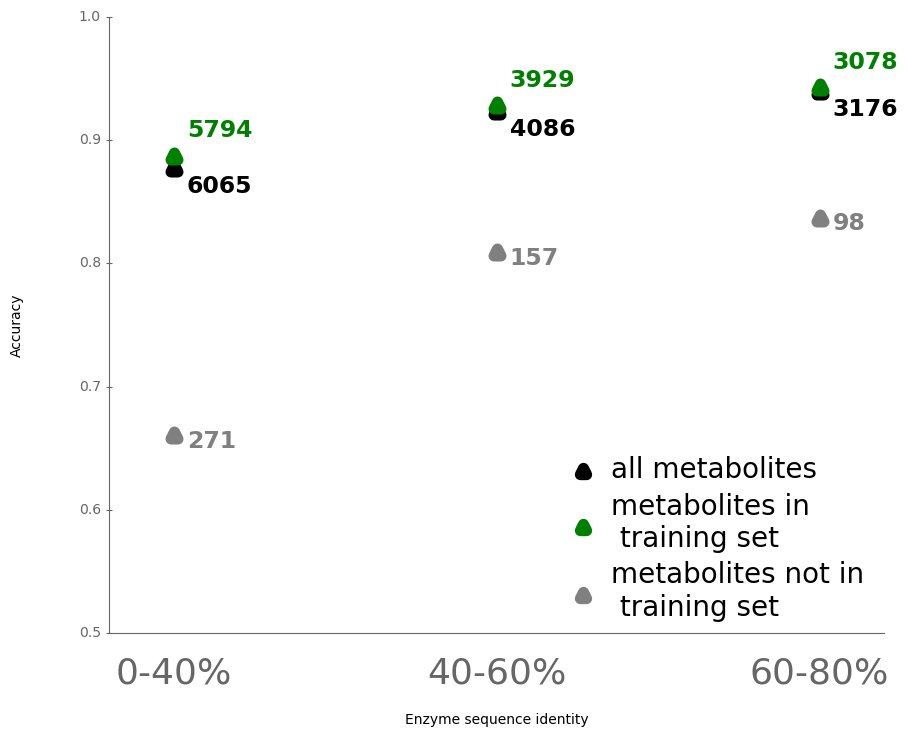

In [5]:
'''font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

fig, ax = plt.subplots()
#plt.rcParams.update({'font.size': 30})'''

fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

splits = ["<40%", "40-60%", "60-80%"]

for i, split in enumerate(splits):
    
    help_df = df_test.loc[df_test["identity"]== split]
    y_true = np.array(help_df["Binding"])
    y_pred = np.array(help_df["pred"])
    y_pred_sub = help_df["pred"].loc[help_df["sub_train_count"]>=1]
    y_true_sub = help_df["Binding"].loc[help_df["sub_train_count"]>=1]
    y_pred_no_sub = help_df["pred"].loc[help_df["sub_train_count"]== 0]
    y_true_no_sub = help_df["Binding"].loc[help_df["sub_train_count"]== 0]
    
    acc = np.mean(np.round(y_pred) == y_true)
    acc_sub = np.mean(np.round(y_pred_sub) == y_true_sub)
    acc_no_sub = np.mean(np.round(y_pred_no_sub) == y_true_no_sub)

    
    print(split, acc)
    print("no sub", split, acc_no_sub)
    if i ==0:
        plt.scatter(i, acc, c='black', marker='^', linewidths= 8,
                    label ="all metabolites")
        plt.scatter(i, acc_sub, c='green', marker='^', linewidths= 8,
                    label ="metabolites in \n training set")
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8,
                    label ="metabolites not in \n training set")
        ax.annotate(len(y_pred), (i+0.04, acc-0.02), fontsize=17, c= "black", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015), fontsize=17, c='green', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=17, c='grey', weight = "bold")

    else:
        plt.scatter(i, acc, c='black', marker='^', linewidths= 8)
        plt.scatter(i, acc_sub, c='green', marker='^', linewidths= 8)
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8)
        ax.annotate(len(y_pred), (i+0.04, acc-0.02), fontsize=17, c = "black", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015), fontsize=17, c='green', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=17,  c='grey', weight = "bold")


ticks2 = np.array([0,1,2])
labs = ["0-40%", "40-60%", "60-80%"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0.5,1))
plt.xlim((-0.2, 2.2))
plt.legend(loc = "lower right", fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.11, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.show()

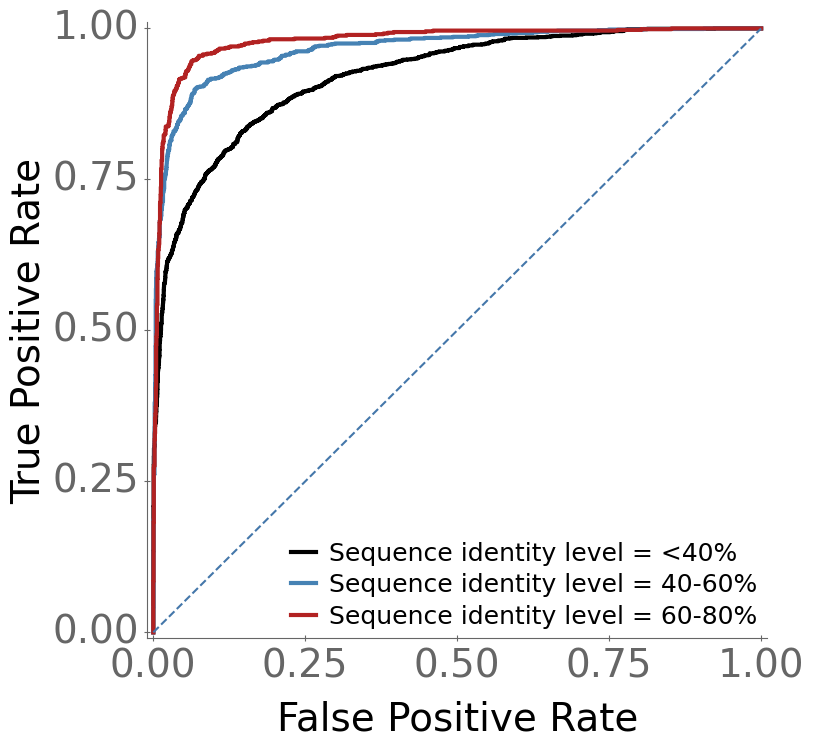

In [6]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})

splits = ["<40%", "40-60%", "60-80%"]
colors = ["black", "steelblue", "firebrick"]

for i, split in enumerate(splits):
    
    help_df = df_test.loc[df_test["identity"]== split]
    y_true = np.array(help_df["Binding"])
    y_pred = np.array(help_df["pred"])
    
    
    fpr_esm1b_ecfp, tpr_esm1b_ecfp, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc_esm1b_ecfp = metrics.auc(fpr_esm1b_ecfp, tpr_esm1b_ecfp)
    
    plt.plot(fpr_esm1b_ecfp, tpr_esm1b_ecfp, colors[i],
             label = 'Sequence identity level = %s' % split, linewidth=3.0)
    



plt.legend(loc = "lower right", fontsize=18)
plt.plot([0, 1], [0, 1],'--')
eps = 0.01
plt.xlim([0-eps, 1+eps])
plt.ylim([0-eps, 1+eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.yaxis.set_label_coords(-0.16, 0.5)
ax.xaxis.set_label_coords(0.5,-0.1)

ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

plt.show()

<40% 0.9217156354983203
no sub <40% 0.5741492146596859
40-60% 0.9654536403710642
no sub 40-60% 0.6035042180402337
60-80% 0.9792075412761249
no sub 60-80% 0.6648936170212766


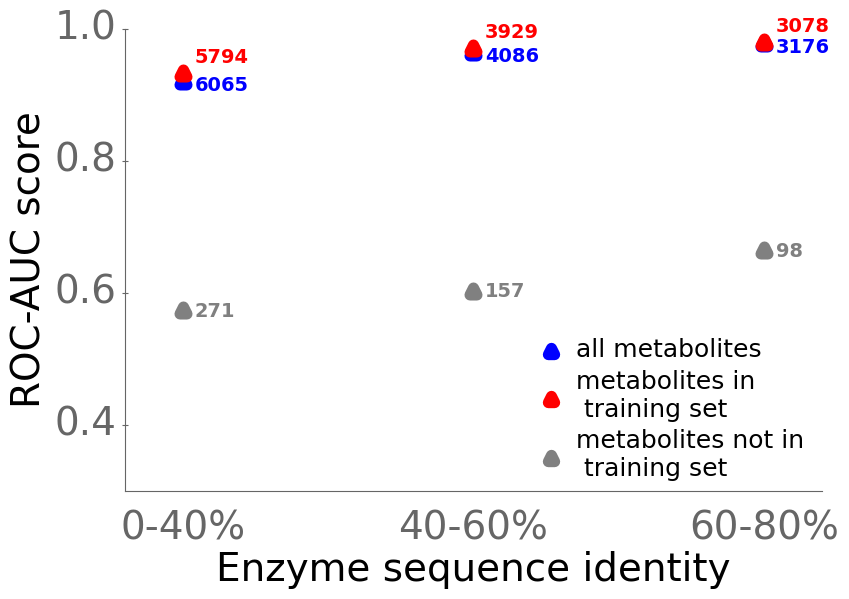

In [7]:
fig, ax = plt.subplots(figsize= (9,6))
plt.rcParams.update({'font.size': 28})

splits = ["<40%", "40-60%", "60-80%"]

for i, split in enumerate(splits):
    
    help_df = df_test.loc[df_test["identity"]== split]
    y_true = np.array(help_df["Binding"])
    y_pred = np.array(help_df["pred"])
    y_pred_sub = help_df["pred"].loc[help_df["sub_train_count"]>=1]
    y_true_sub = help_df["Binding"].loc[help_df["sub_train_count"]>=1]
    y_pred_no_sub = help_df["pred"].loc[help_df["sub_train_count"]== 0]
    y_true_no_sub = help_df["Binding"].loc[help_df["sub_train_count"]== 0]
    
    
    acc = roc_auc_score(y_true, (y_pred))
    acc_sub = roc_auc_score(y_true_sub, (y_pred_sub))
    acc_no_sub = roc_auc_score(y_true_no_sub, (y_pred_no_sub))
    
    
    
    print(split, acc)
    print("no sub", split, acc_no_sub)
    if i ==0:
        plt.scatter(i, acc, c='blue', marker='^', linewidths= 8,
                    label ="all metabolites")
        plt.scatter(i, acc_sub, c='red', marker='^', linewidths= 8,
                    label ="metabolites in \n training set")
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8,
                    label ="metabolites not in \n training set")
        ax.annotate(len(y_pred), (i+0.04, acc-0.015), fontsize=14, c= "blue", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015), fontsize=14, c='red', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=14, c='grey', weight = "bold")

    else:
        plt.scatter(i, acc, c='blue', marker='^', linewidths= 8)
        plt.scatter(i, acc_sub, c='red', marker='^', linewidths= 8)
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8)
        ax.annotate(len(y_pred), (i+0.04, acc-0.015),fontsize=14, c = "blue", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015),fontsize=14, c='red', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=14,  c='grey', weight = "bold")


ticks2 = np.array([0,1,2])
labs = ["0-40%", "40-60%", "60-80%"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0.3,1))
plt.xlim((-0.2, 2.2))
plt.legend(loc = "lower right", fontsize=18)
plt.ylabel('ROC-AUC score')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.11, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.show()

<40% 0.6769373885503904
no sub <40% -0.007061365100885804
40-60% 0.8062955638617622
no sub 40-60% -0.024677523532726422
60-80% 0.8525708082530685
no sub 60-80% 0.06316139407998893


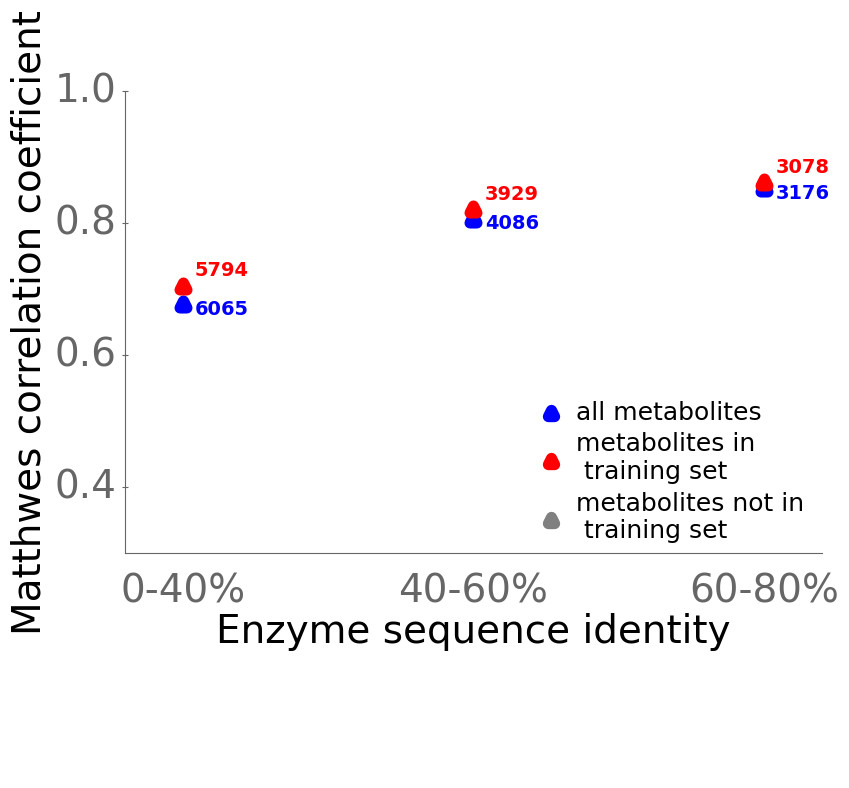

In [8]:
from sklearn.metrics import matthews_corrcoef

fig, ax = plt.subplots(figsize= (9,6))
plt.rcParams.update({'font.size': 28})

splits = ["<40%", "40-60%", "60-80%"]

for i, split in enumerate(splits):
    
    help_df = df_test.loc[df_test["identity"]== split]
    y_true = np.array(help_df["Binding"])
    y_pred = np.array(help_df["pred"])
    y_pred_sub = help_df["pred"].loc[help_df["sub_train_count"]>=1]
    y_true_sub = help_df["Binding"].loc[help_df["sub_train_count"]>=1]
    y_pred_no_sub = help_df["pred"].loc[help_df["sub_train_count"]== 0]
    y_true_no_sub = help_df["Binding"].loc[help_df["sub_train_count"]== 0]
    
    
    acc = matthews_corrcoef(y_true, np.round(y_pred))
    acc_sub = matthews_corrcoef(y_true_sub, np.round(y_pred_sub))
    acc_no_sub = matthews_corrcoef(y_true_no_sub, np.round(y_pred_no_sub))
    
    
    
    print(split, acc)
    print("no sub", split, acc_no_sub)
    if i ==0:
        plt.scatter(i, acc, c='blue', marker='^', linewidths= 8,
                    label ="all metabolites")
        plt.scatter(i, acc_sub, c='red', marker='^', linewidths= 8,
                    label ="metabolites in \n training set")
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8,
                    label ="metabolites not in \n training set")
        ax.annotate(len(y_pred), (i+0.04, acc-0.015), fontsize=14, c= "blue", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015), fontsize=14, c='red', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=14, c='grey', weight = "bold")

    else:
        plt.scatter(i, acc, c='blue', marker='^', linewidths= 8)
        plt.scatter(i, acc_sub, c='red', marker='^', linewidths= 8)
        plt.scatter(i, acc_no_sub, c='grey', marker='^', linewidths= 8)
        ax.annotate(len(y_pred), (i+0.04, acc-0.015),fontsize=14, c = "blue", weight = "bold")
        ax.annotate(len(y_pred_sub), (i+0.04, acc_sub+0.015),fontsize=14, c='red', weight = "bold")
        ax.annotate(len(y_pred_no_sub), (i+0.04, acc_no_sub-0.01), fontsize=14,  c='grey', weight = "bold")


ticks2 = np.array([0,1,2])
labs = ["0-40%", "40-60%", "60-80%"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0.3,1))
plt.xlim((-0.2, 2.2))
plt.legend(loc = "lower right", fontsize=18)
plt.ylabel('Matthwes correlation coefficient')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.11, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.show()

In [9]:
len(set(list(df_test["Uniprot ID"])))

2291

### Plotting the results of hyperparameter optimization ESM-1b and ESM-1b_ts:
Boxplots for 5-fold CV (accuracy) and test set

In [59]:
accuracy_CV_ESM1b_ECFP = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "acc_CV_xgboost_ESM1b_ECFP.npy"))
ROC_AUC_CV_ESM1b_ECFP = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "ROC_AUC_CV_xgboost_ESM1b_ECFP.npy"))

accuracy_CV_ESM1b_ts_ECFP = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "acc_CV_xgboost_ESM1b_ts_ECFP.npy"))
ROC_AUC_CV_ESM1b_ts_ECFP = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "ROC_AUC_CV_xgboost_ESM1b_ts_ECFP.npy"))

accuracy_CV_ESM1b_GNN = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "acc_CV_xgboost_ESM1b_ECFP.npy"))
ROC_AUC_CV_ESM1b_GNN = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "ROC_AUC_CV_xgboost_ESM1b_ECFP.npy"))

accuracy_CV_ESM1b_ts_GNN = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "acc_CV_xgboost_ESM1b_ts_GNN.npy"))
ROC_AUC_CV_ESM1b_ts_GNN = np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "ROC_AUC_CV_xgboost_ESM1b_ts_GNN.npy"))


In [60]:
y_test_pred_esm1b_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ECFP.npy"))
test_y_esm1b_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ECFP.npy"))

y_test_pred_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))
test_y_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP.npy"))

y_test_pred_esm1b_GNN =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_GNN.npy"))
test_y_esm1b_GNN =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_GNN.npy"))

y_test_pred_esm1b_ts_GNN =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN.npy"))
test_y_esm1b_ts_GNN =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN.npy"))




acc_esm1b_ecfp_test = np.mean(np.round(y_test_pred_esm1b_ecfp) == test_y_esm1b_ecfp)
acc_esm1b_ts_ecfp_test = np.mean(np.round(y_test_pred_esm1b_ts_ecfp) == test_y_esm1b_ts_ecfp)

roc_auc_esm1b_ecfp_test = roc_auc_score(test_y_esm1b_ecfp, y_test_pred_esm1b_ecfp)
roc_auc_esm1b_ts_ecfp_test = roc_auc_score(test_y_esm1b_ts_ecfp, y_test_pred_esm1b_ts_ecfp)

acc_esm1b_GNN_test = np.mean(np.round(y_test_pred_esm1b_GNN) == test_y_esm1b_GNN)
acc_esm1b_ts_GNN_test = np.mean(np.round(y_test_pred_esm1b_ts_GNN) == test_y_esm1b_ts_GNN)

roc_auc_esm1b_GNN_test = roc_auc_score(test_y_esm1b_GNN, y_test_pred_esm1b_GNN)
roc_auc_esm1b_ts_GNN_test = roc_auc_score(test_y_esm1b_ts_GNN, y_test_pred_esm1b_ts_GNN)

#### (a) Accuracy:

In [61]:
acc_esm1b_ecfp_test, acc_esm1b_GNN_test

(0.8732035928143712, 0.9051646706586827)

In [62]:
acc_esm1b_ts_ecfp_test, acc_esm1b_ts_GNN_test

(0.9063622754491018, 0.9028443113772455)

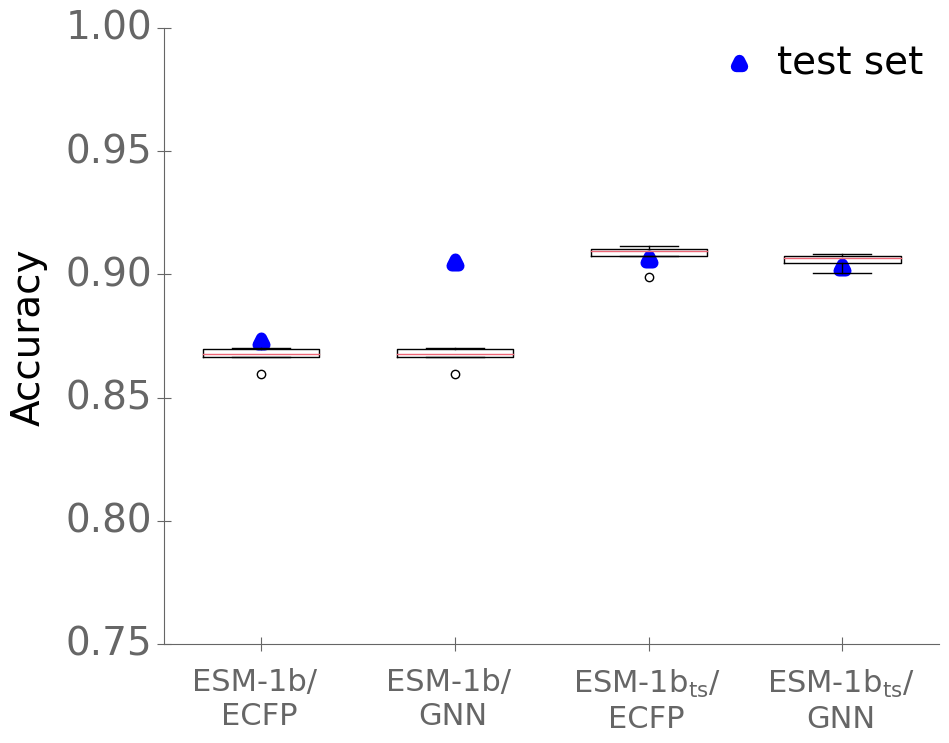

In [63]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})
labs = ["ESM-1b/ \nECFP",  "ESM-1b/ \nGNN", "ESM-$1b_{ts}$/ \nECFP", "ESM-$1b_{ts}$/ \nGNN"]


plt.scatter(1, acc_esm1b_ecfp_test, c='blue', marker='^', linewidths= 8)
plt.scatter(3, acc_esm1b_ts_ecfp_test , c='blue', marker='^', linewidths= 8, label = "test set")
plt.scatter(2, acc_esm1b_GNN_test, c='blue', marker='^', linewidths= 8)
plt.scatter(4, acc_esm1b_ts_GNN_test , c='blue', marker='^', linewidths= 8)


plt.boxplot([accuracy_CV_ESM1b_ECFP, accuracy_CV_ESM1b_GNN,
             accuracy_CV_ESM1b_ts_ECFP, accuracy_CV_ESM1b_ts_GNN], positions=[1,2,3,4],  widths=0.6, whis =2)

plt.ylim(0.75, 1)
ticks1 = [1,2,3,4]

ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
ticks2 = [0.99, 1.99,2.99,3.99]

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 0)

plt.ylabel("Accuracy")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.show()

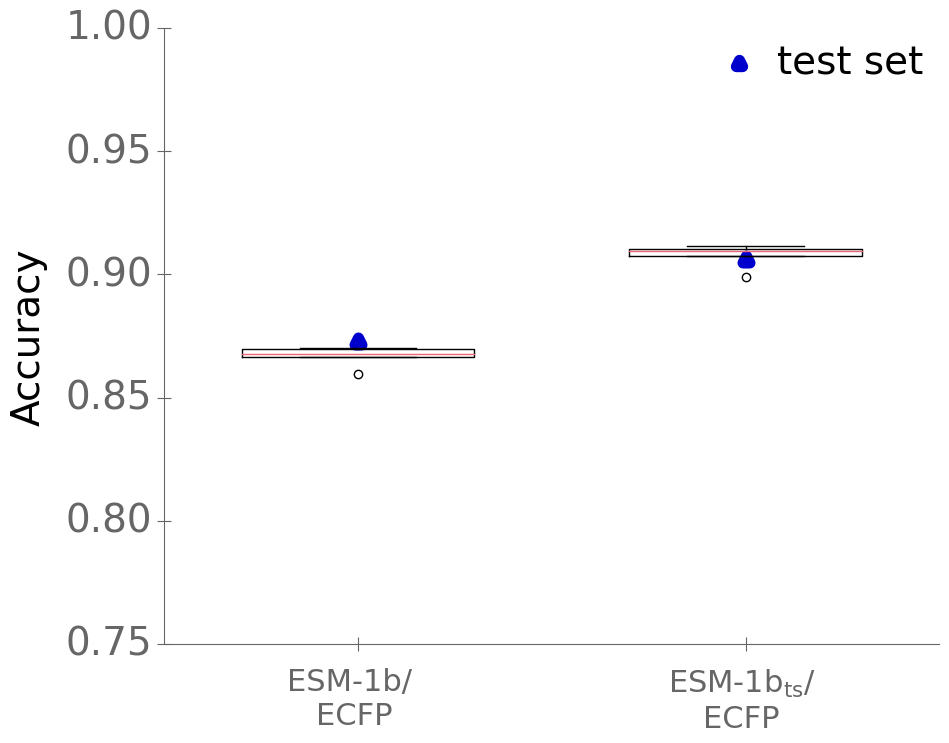

In [64]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})
labs = ["ESM-1b/ \nECFP",  "ESM-$1b_{ts}$/ \nECFP"]


plt.scatter(1, acc_esm1b_ecfp_test, c='mediumblue', marker='^', linewidths= 8, label = "test set")

plt.scatter(2, acc_esm1b_ts_ecfp_test, c='mediumblue', marker='^', linewidths= 8)


plt.boxplot([accuracy_CV_ESM1b_ECFP, accuracy_CV_ESM1b_ts_ECFP,], positions=[1,2],  widths=0.6, whis =2)

plt.ylim(0.75, 1)
ticks1 = [1,2]

ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
ticks2 = [0.99, 1.99]

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 0)

plt.ylabel("Accuracy")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.show()

#### (b) ROC-AUC scores

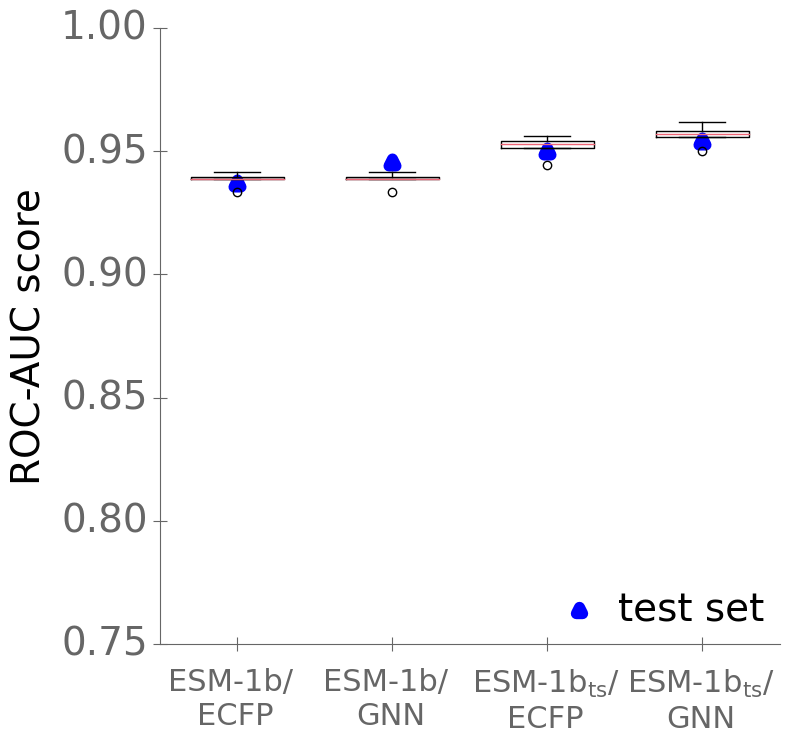

In [65]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})
labs = ["ESM-1b/ \nECFP",  "ESM-1b/ \nGNN", "ESM-$1b_{ts}$/ \nECFP", "ESM-$1b_{ts}$/ \nGNN"]


plt.scatter(1, roc_auc_esm1b_ecfp_test, c='blue', marker='^', linewidths= 8)
plt.scatter(3, roc_auc_esm1b_ts_ecfp_test , c='blue', marker='^', linewidths= 8, label = "test set")
plt.scatter(2, roc_auc_esm1b_GNN_test, c='blue', marker='^', linewidths= 8)
plt.scatter(4, roc_auc_esm1b_ts_GNN_test , c='blue', marker='^', linewidths= 8)


plt.boxplot([ROC_AUC_CV_ESM1b_ECFP, ROC_AUC_CV_ESM1b_GNN,  ROC_AUC_CV_ESM1b_ts_ECFP, 
              ROC_AUC_CV_ESM1b_ts_GNN], positions=[1,2,3,4],  widths=0.6, whis =2)

plt.ylim(0.75, 1)
ticks1 = [1,2,3,4]

ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
ticks2 = [0.99, 1.99,2.99,3.99]

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 0)

plt.ylabel("ROC-AUC score")
ax.yaxis.set_label_coords(-0.18, 0.5)
plt.legend(loc = "lower right")
plt.show()

### Plotting distribution of predicted values:

In [7]:
y_test_pred=  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))
test_y =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP.npy"))

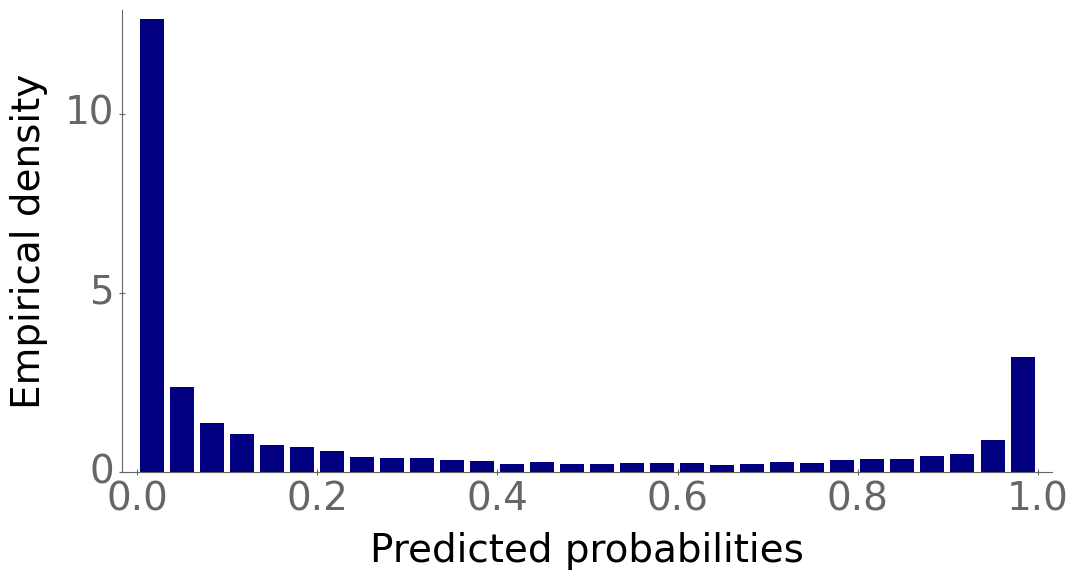

In [8]:

plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))
#plt.title("Distribution of predicted probabilities", fontsize= 30, y= 1)

plt.hist(y_test_pred,
         density = True, bins= 30, rwidth = 0.8, color= "navy")

plt.xlabel('Predicted probabilities')
plt.ylabel('Empirical density')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.show()

In [4]:
unsure = np.array(y_test_pred < .6) * np.array([y_test_pred > .4])

In [5]:
np.mean(unsure)

0.04842814371257485

In [6]:
y_test_pred

array([0.93361694, 0.9979367 , 0.08058584, ..., 0.02723099, 0.5507995 ,
       0.00139621], dtype=float32)

In [7]:
y_test_pred_sure = y_test_pred[~unsure[0]]
y_test_sure = test_y[~unsure[0]]

y_test_pred_unsure = y_test_pred[unsure[0]]
y_test_unsure = test_y[unsure[0]]

In [8]:
np.mean(np.round(y_test_pred_sure) == y_test_sure), np.mean(np.round(y_test_pred_unsure) == y_test_unsure)

(0.9245654054904429, 0.5486862442040186)

In [9]:
roc_auc_score( y_test_sure, y_test_pred_sure), roc_auc_score(y_test_unsure, y_test_pred_unsure)

(0.9555710779275287, 0.5793224540384219)

#### Plotting only wrong predictions:

In [9]:
y_test_pred=  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))
test_y =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP.npy"))

In [11]:
wrong_predictions = [np.round(y_test_pred[i]) != test_y[i] for i in range(len(test_y))]

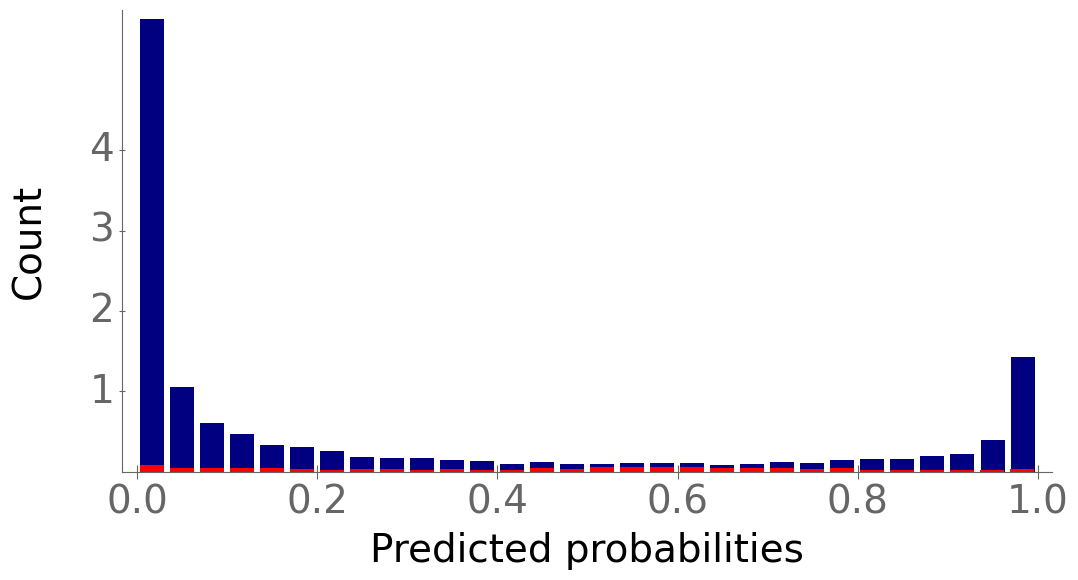

In [41]:

plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (12,6))
#plt.title("Distribution of predicted probabilities", fontsize= 30, y= 1)


plt.hist(y_test_pred, density = False, bins= 30, rwidth = 0.8, color= "navy")
plt.hist(y_test_pred[wrong_predictions], density = False, bins= 30, rwidth = 0.8, color= "red")


plt.xlabel('Predicted probabilities')
plt.ylabel('Count')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

ticks1 = [1000,2000,3000,4000]

ax.set_yticks(ticks1)
ax.set_yticklabels(["1", "2", "3", "4"])
ax.tick_params(axis='x', which="major", length=10)


#plt.yscale('log')

plt.show()

#### Effect of training set size

In [74]:
perc_train_UIDs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]
accuracies = [0.8218260705527259, 0.8383323901150727, 0.8461611016789286, 0.8544614223731372, 0.862101490284852, 0.8689869835880023, 0.8740803621958121, 0.8780418788907753]
roc_auc_scores = [0.8993568900892903, 0.9138827715820028, 0.9214056778536516, 0.9294462532135879, 0.9341809206322669, 0.9406835217688049, 0.9453938280537131, 0.947575420628904]

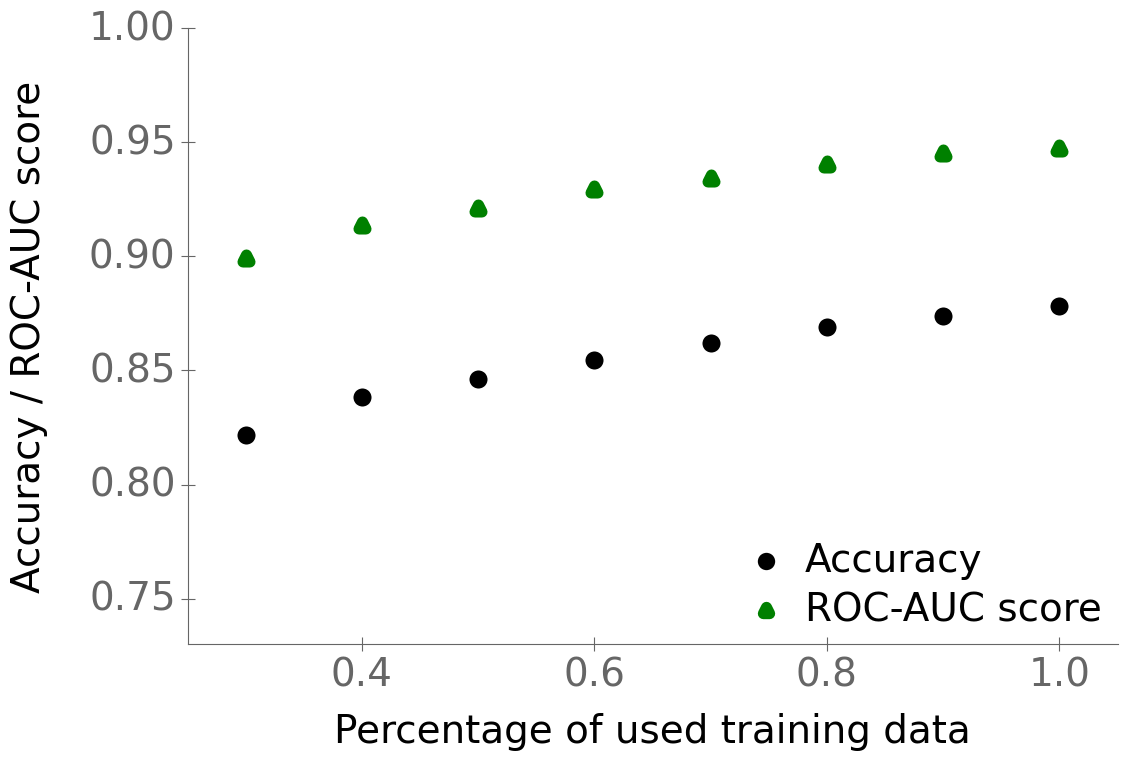

In [75]:
fig, ax = plt.subplots(figsize= (12,8))
plt.rcParams.update({'font.size': 28})

plt.scatter(perc_train_UIDs[:len(accuracies)], accuracies, c='black', marker='o', linewidths= 8, label = "Accuracy")
plt.scatter(perc_train_UIDs[:len(accuracies)], roc_auc_scores, c='green', marker='^', linewidths= 8, label = "ROC-AUC score")

plt.ylim(0.73, 1.0)
plt.xlim(0.25, 1.05)
#ticks1 = [1,2,3,4]
#ax.locator_params(axis="y", nbins=4)

ax.locator_params(axis="y", nbins=6)

ax.tick_params(axis='y', length=10)
ax.tick_params(axis='x',length=10)
plt.xlabel("Percentage of used training data")
plt.ylabel("Accuracy / ROC-AUC score")
ax.xaxis.set_label_coords(0.5, -0.11)
ax.yaxis.set_label_coords( -0.15, 0.5)
plt.legend(loc = "lower right")
plt.show()